In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('audio_features - Copy.csv')


In [3]:
print("Jumlah Data:", len(df))
print("\n5 Data Pertama:")
display(df.head())

Jumlah Data: 40

5 Data Pertama:


,Mean,Median,Std,Var,Max,Min,25th Percentile,75th Percentile,Spectral Centroid,Spectral Bandwidth,Spectral Flatness,Spectral Rolloff,Peak Frequency,RMS,Spectral Skewness,Spectral Kurtosis,Label
0,573807.344576,65823.501555,1.762649e+06,3.106930e+12,3.273098e+07,18.704577,22667.034749,465183.614083,1045.988676,1153.017330,0.157278,538.256259,376.705445,1.853695e+06,2.517883,11.245159,crying
1,59088.452071,9520.214731,2.840597e+05,8.068991e+10,7.290303e+06,1.063642,2890.359062,27863.069787,1053.506256,1664.055466,0.146487,384.338739,379.091176,2.901402e+05,2.698306,9.607174,crying
2,94059.312189,36728.910846,3.312993e+05,1.097592e+11,8.303505e+06,4.846819,20239.996693,61250.919218,1797.233448,2292.480687,0.362351,334.356795,156.718073,3.443928e+05,1.240019,3.035578,crying
3,209931.205088,38181.775188,1.169516e+06,1.367768e+12,2.721719e+07,2.233405,18629.379566,76200.729084,1066.046317,1659.386973,0.178065,386.667229,339.471577,1.188209e+06,2.636693,8.862201,crying
4,162671.474508,114912.480993,2.455587e+05,6.029907e+10,7.331892e+06,38.101189,63362.253362,196205.542554,3380.279422,2369.795633,0.614313,4466.678104,150.969291,2.945523e+05,0.103915,1.746661,crying


In [5]:
print("\nDistribusi Kelas:")
print(df['Label'].value_counts())


Distribusi Kelas:
crying      20
laughing    20
Name: Label, dtype: int64


In [8]:
X = df.drop('Label', axis=1)
y = df['Label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return accuracy_score(y_test, y_pred)



Evaluasi untuk Metrik EUCLIDEAN


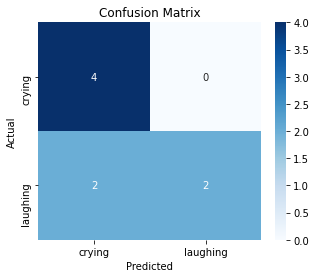


Classification Report:
              precision    recall  f1-score   support

      crying       0.67      1.00      0.80         4
    laughing       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8


Evaluasi untuk Metrik MANHATTAN


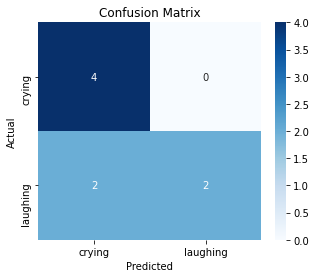


Classification Report:
              precision    recall  f1-score   support

      crying       0.67      1.00      0.80         4
    laughing       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8


Evaluasi untuk Metrik CHEBYSHEV


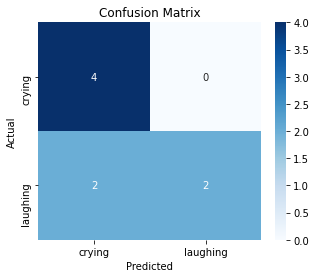


Classification Report:
              precision    recall  f1-score   support

      crying       0.67      1.00      0.80         4
    laughing       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [12]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
results = {}

for metric in metrics:
    print(f"\n{'='*40}")
    print(f"Evaluasi untuk Metrik {metric.upper()}")
    print(f"{'='*40}")
    
    # Membuat dan melatih model
    knn = KNeighborsClassifier(
        n_neighbors=3,
        metric=metric
    )
    knn.fit(X_train_scaled, y_train)
    
    # Evaluasi model
    acc = evaluate_model(knn, X_test_scaled, y_test)
    results[metric] = acc

In [13]:
print("\nPerbandingan Akurasi Akhir:")
for metric, accuracy in results.items():
    print(f"{metric.upper():<10}: {accuracy:.2%}")


Perbandingan Akurasi Akhir:
EUCLIDEAN : 75.00%
MANHATTAN : 75.00%
CHEBYSHEV : 75.00%
